In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale, StandardScaler, normalize

In [2]:
# upload the dataset
df=pd.read_csv('ECommerce_consumer behaviour.csv')
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [4]:
# Detecting null values and sort them in descending order
df.isnull().sum().sort_values(ascending=False)

days_since_prior_order    124342
order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

### We have some Null values in our dataset, that need to be corrected.

In [5]:
df.nunique()

order_id                  200000
user_id                   105273
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
dtype: int64

### Dataset is base in 100 orders, and we have 70k users and more than 103k orders so we assume that some customer order more than 1 time.

In [6]:
# fill NAN values in "days_since_prior_order" column with -1 
df['days_since_prior_order'] = df['days_since_prior_order'].fillna(-1)

### We fill null values with -1, we are using this imputation method thus 'days_since_prior_order' is column that reflects the days since a first order was made, using -1 can reflect the lack of that prior order and keep the columns.

In [7]:
# Detecting null values and sort them in descending order
df.isnull().sum().sort_values(ascending=False)

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

In [8]:
print("df:", df.index)

df: RangeIndex(start=0, stop=2019501, step=1)


In [9]:
df.tail(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
2019491,3390742,199430,16,3,18,5.0,14,3,0,20,deli,tofu meat alternatives
2019492,3390742,199430,16,3,18,5.0,104,4,0,13,pantry,spices seasonings
2019493,3390742,199430,16,3,18,5.0,104,5,0,13,pantry,spices seasonings
2019494,3390742,199430,16,3,18,5.0,120,6,0,16,dairy eggs,yogurt
2019495,3390742,199430,16,3,18,5.0,24,7,0,4,produce,fresh fruits
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce
2019500,458285,128787,42,2,19,3.0,123,4,1,4,produce,packaged vegetables fruits


In [10]:
df_clean = df.copy()

### Create a copy of the dataset

In [11]:
#Changing dtype from numeric to category
df_clean.loc[:, 'department_id'] = df_clean['department_id'].astype('category')
df_clean.loc[:, 'product_id'] = df_clean['product_id'].astype('category')
df_clean.loc[:, 'order_id'] = df_clean['order_id'].astype('category')
df_clean.loc[:, 'user_id'] = df_clean['user_id'].astype('category')
df_clean.loc[:, 'reordered'] = df_clean['reordered'].astype('bool')
df_clean.loc[:, 'days_since_prior_order'] = df_clean['days_since_prior_order'].astype('int64')



/var/folders/j_/17hfq_393_z27nrwb3vr52qh0000gn/T/ipykernel_49347/1733524440.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_clean.loc[:, 'days_since_prior_order'] = df_clean['days_since_prior_order'].astype('int64')


### We changed the dtypes of some columns to show a better representation of what kind of data we have. 'department_id', 'product_id', 'order_id' and 'user_id' we changed to 'category' because their information is more like labels and not numbers, and 'reordered' was changed to 'bool' because only takes a binary response (Yes/No or this case 1/0 ).

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                category
 1   user_id                 category
 2   order_number            int64   
 3   order_dow               int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  int64   
 6   product_id              category
 7   add_to_cart_order       int64   
 8   reordered               bool    
 9   department_id           category
 10  department              object  
 11  product_name            object  
dtypes: bool(1), category(4), int64(5), object(2)
memory usage: 141.4+ MB


In [13]:
numerical_columns = df_clean[['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order']]

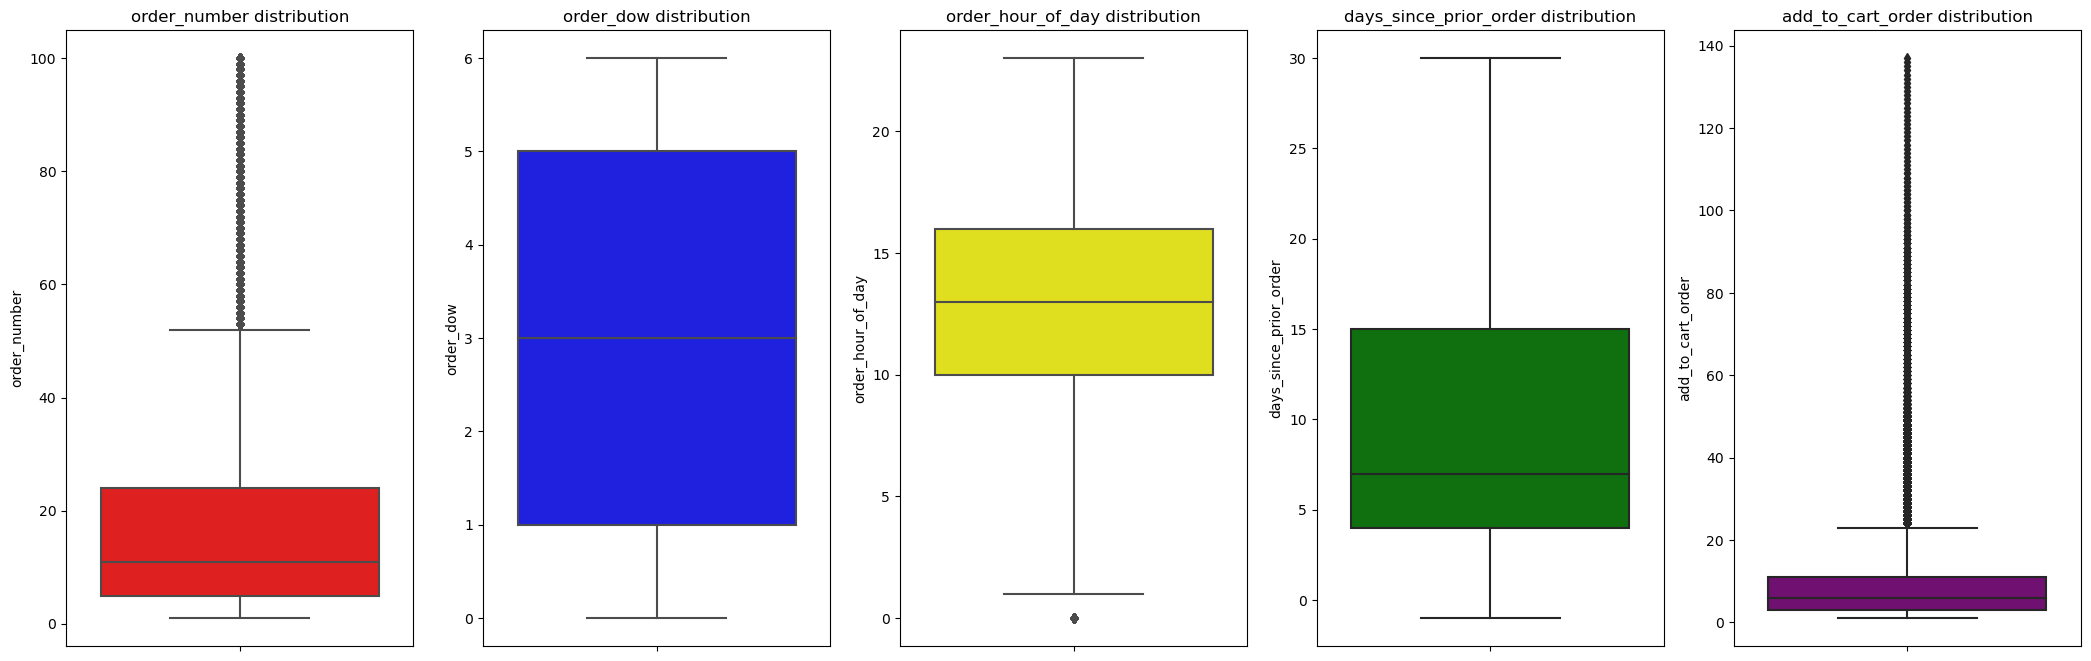

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(26,8))
colors = ['red','blue','yellow','green','purple']
for index, (col, color) in enumerate(zip (numerical_columns, colors)):
    sns.boxplot(data=df_clean, y=col, ax=ax[index], color=color)
    ax[index].set_title(f'{col} distribution')

### We created some boxplot of the numerical variables to see posibles outliers, we have some outliers in 'order_number' and 'add_to_cart_order'

In [15]:
# remove outliers of order_number
Q1, Q3 = np.percentile(df_clean['order_number'], [25, 75])

IQR= Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

outliers1 = (df_clean['order_number'] < lower_threshold)
outliers2 = (df_clean['order_number'] > upper_threshold)

print('number of small outlier: ',outliers1.value_counts())
print('number of big outliers: ', outliers2.value_counts())

number of small outlier:  False    2019501
Name: order_number, dtype: int64
number of big outliers:  False    1909332
True      110169
Name: order_number, dtype: int64


In [16]:
df_clean = df_clean[~(outliers1 | outliers2)]

In [17]:
# remove outliers of add_to_cart_order
Q1, Q3 = np.percentile(df_clean['add_to_cart_order'], [25, 75])

IQR= Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

outliers3 = (df_clean['add_to_cart_order'] < lower_threshold)
outliers4 = (df_clean['add_to_cart_order'] > upper_threshold)

print('number of small outlier: ',outliers3.value_counts())
print('number of big outliers: ', outliers4.value_counts())

number of small outlier:  False    1909332
Name: add_to_cart_order, dtype: int64
number of big outliers:  False    1850573
True       58759
Name: add_to_cart_order, dtype: int64


In [18]:
df_clean = df_clean[~(outliers3 | outliers4)]

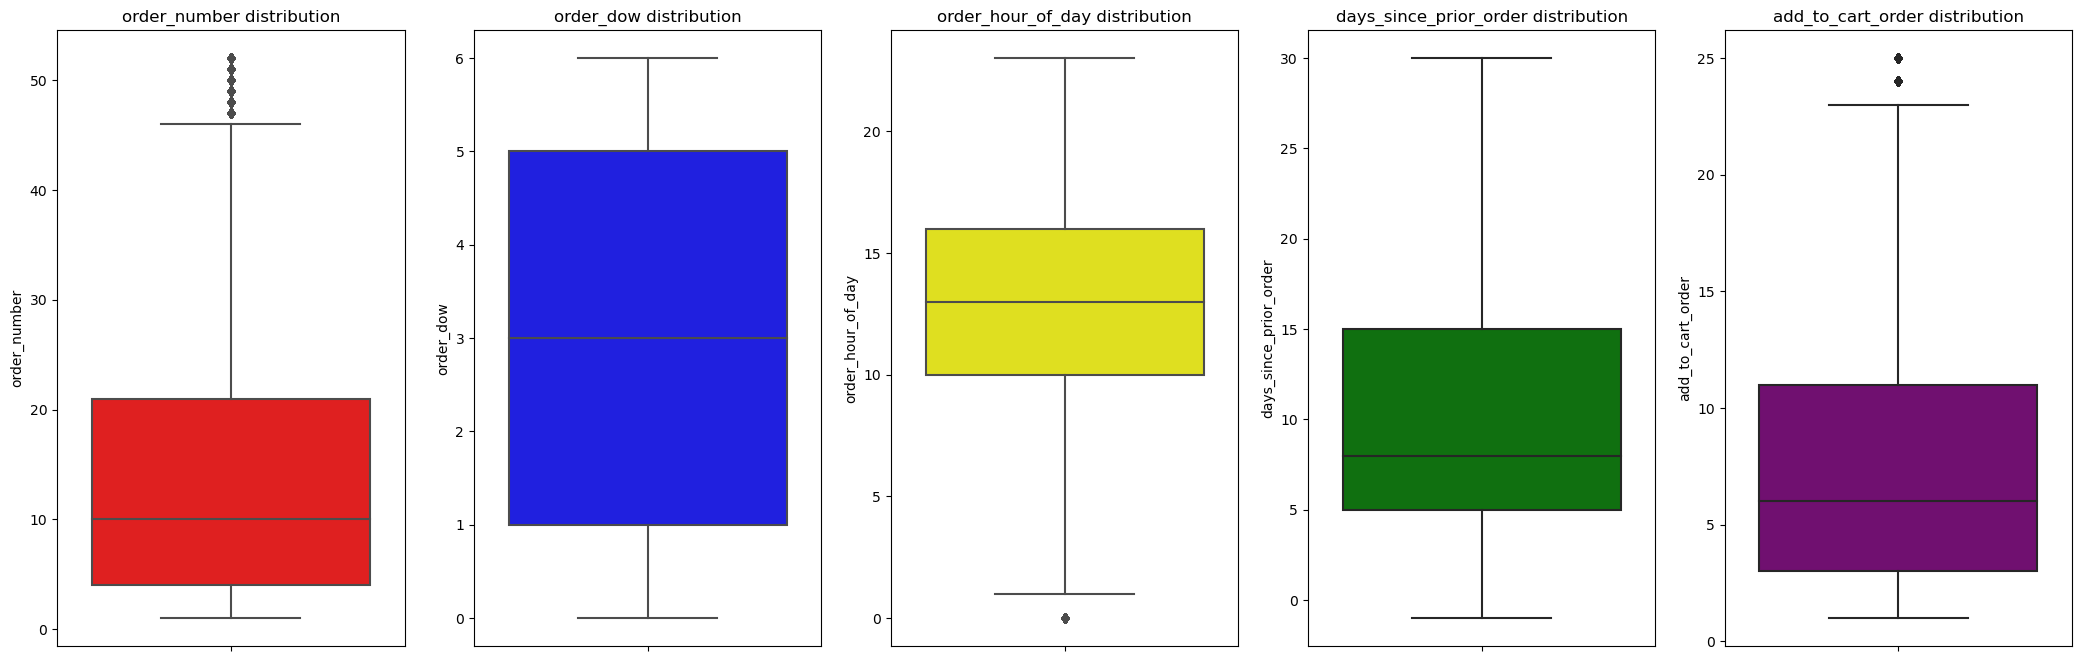

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(26,8))
colors = ['red','blue','yellow','green','purple']
for index, (col, color) in enumerate(zip (numerical_columns, colors)):
    sns.boxplot(data=df_clean, y=col, ax=ax[index], color=color)
    ax[index].set_title(f'{col} distribution')

### We cleaned the outliers and now we have a better box plots.

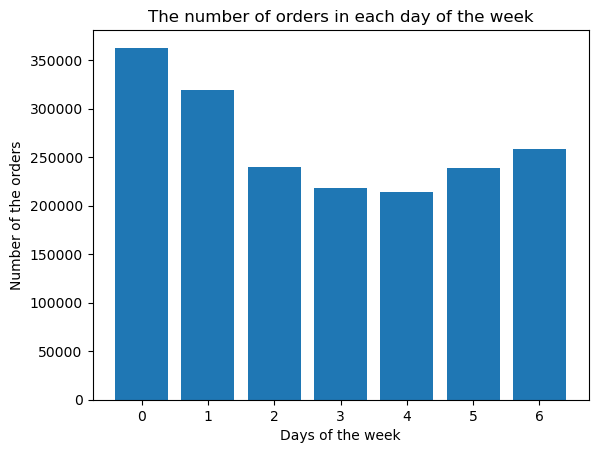

In [20]:
# Finding the relationship between the days of the week and the number of orders

plt.bar(df_clean.groupby('order_dow').size().index, df_clean.groupby('order_dow').size().values)

plt.title('The number of orders in each day of the week')
plt.xlabel('Days of the week')
plt.ylabel('Number of the orders')
plt.show()

### We can see that the numbers of orders are high on 0 and 1 (Monday and Tuesday).

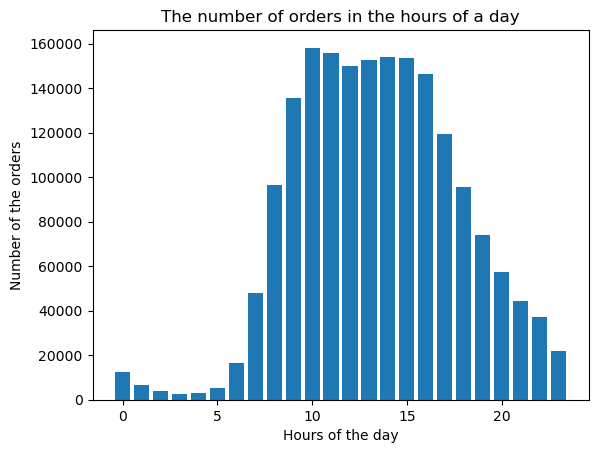

In [21]:
# Finding the relationship between the hours in a day and the number of orders

plt.bar(df_clean.groupby('order_hour_of_day').size().index, df_clean.groupby('order_hour_of_day').size().values)

plt.title('The number of orders in the hours of a day')
plt.xlabel('Hours of the day')
plt.ylabel('Number of the orders')
plt.show()

### We can see that the high range of people placing theirs orders are between 10 and 17 hrs.

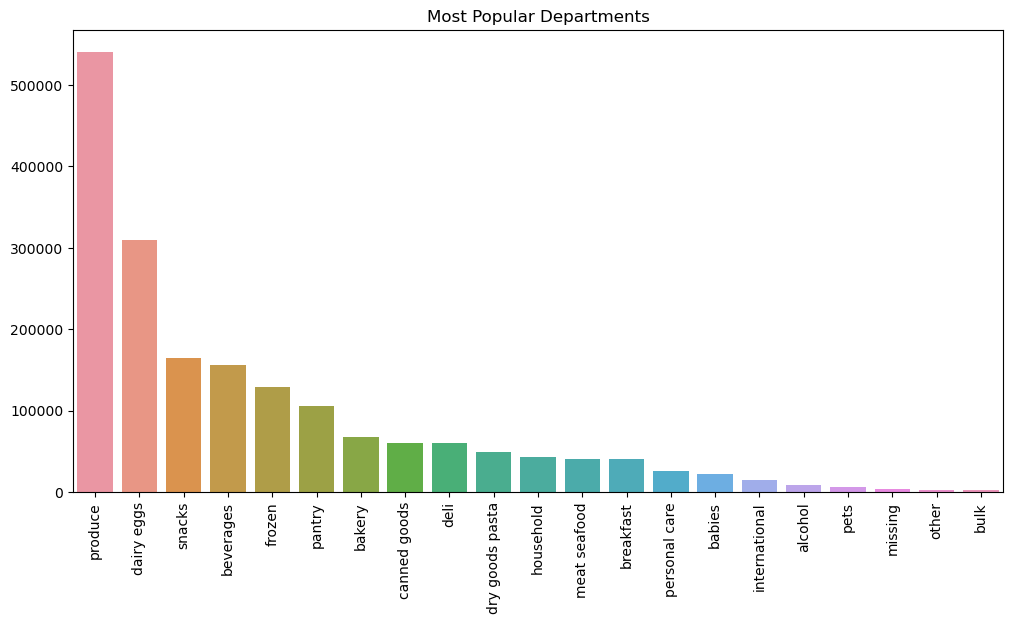

In [22]:
# Find the most popular department 

counts = df_clean['department'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=counts.index, y=counts.values)

plt.title('Most Popular Departments')
plt.xticks(rotation=90)
plt.show()

In [23]:
# find the most the reorderd products 
reorderds = df_clean.groupby('product_name').sum(numeric_only=True)['reordered'].sort_values(ascending=False)

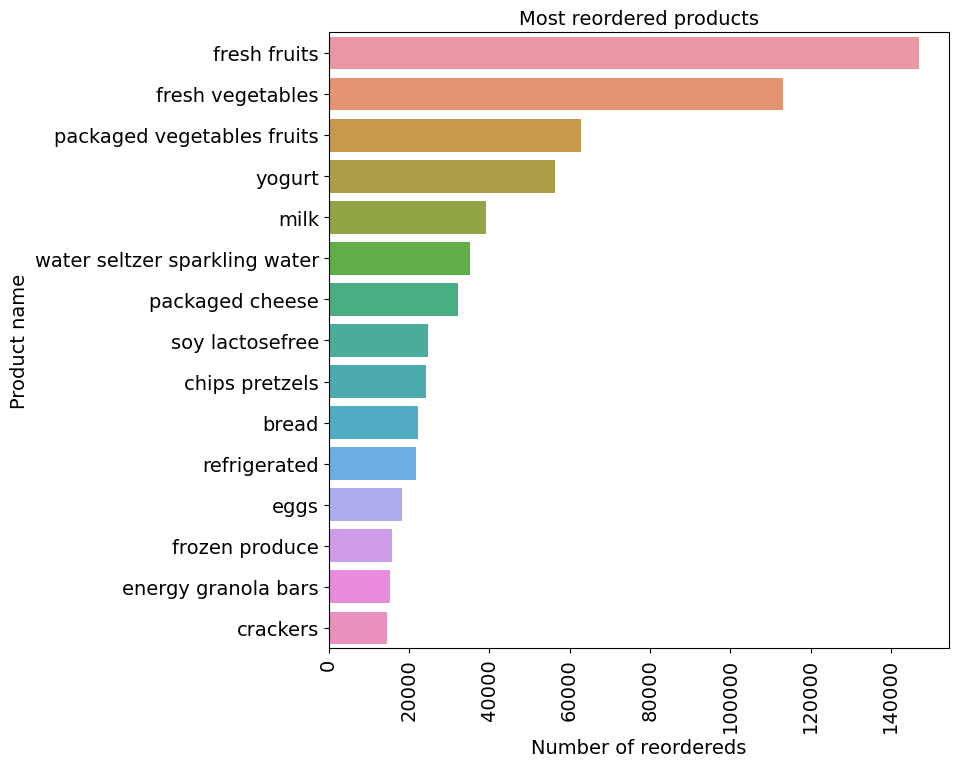

In [24]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=reorderds[0:15].values, y=reorderds[0:15].index, orient='h')

plt.title('Most reordered products', fontsize=14)
plt.xticks(rotation=90)

ax.set_xlabel('Number of reordereds', fontsize=14)
ax.set_ylabel('Product name', fontsize=14)
ax.tick_params(axis='both', labelsize=14)
plt.show()

In [25]:
# finding the most popular products in each department 
product_d = pd.crosstab(df_clean['department'], df_clean['product_name'])
product_d.idxmax(axis=1).to_frame(name="Most popular Product")

,Most popular Product
department,
alcohol,beers coolers
babies,baby food formula
bakery,bread
beverages,water seltzer sparkling water
breakfast,cereal
bulk,bulk grains rice dried goods
canned goods,soup broth bouillon
dairy eggs,yogurt
deli,lunch meat


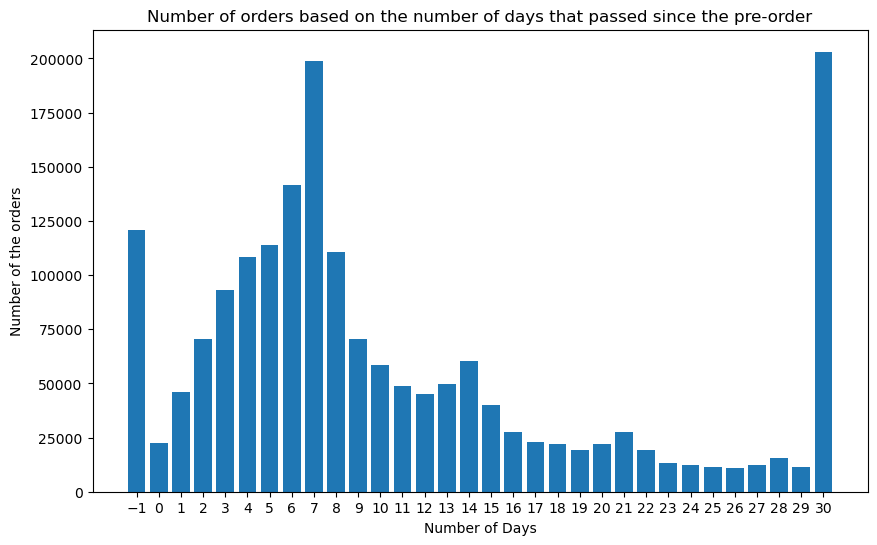

In [26]:
# Finding the relationship the number of orders and days passes since prior order of that.
plt.figure(figsize=(10,6))
plt.bar(df_clean.groupby('days_since_prior_order').size().index, df_clean.groupby('days_since_prior_order').size().values)
plt.title('Number of orders based on the number of days that passed since the pre-order')
plt.xlabel('Number of Days')
plt.ylabel('Number of the orders')
plt.xticks(range(-1, 31))
plt.show()

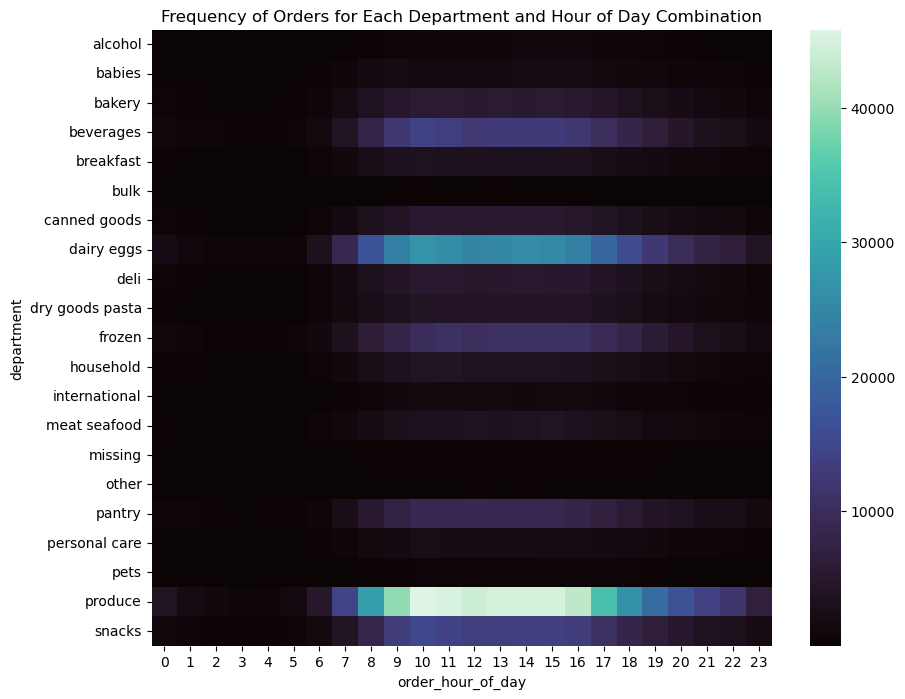

In [27]:
# finding a relationship between departments and order_hour_of_day.
order_frequency = df_clean.pivot_table(index='department', columns='order_hour_of_day', aggfunc='size', fill_value=0)
plt.figure(figsize=(10,8))
sns.heatmap(order_frequency, cmap='mako')
plt.title('Frequency of Orders for Each Department and Hour of Day Combination')
plt.show()

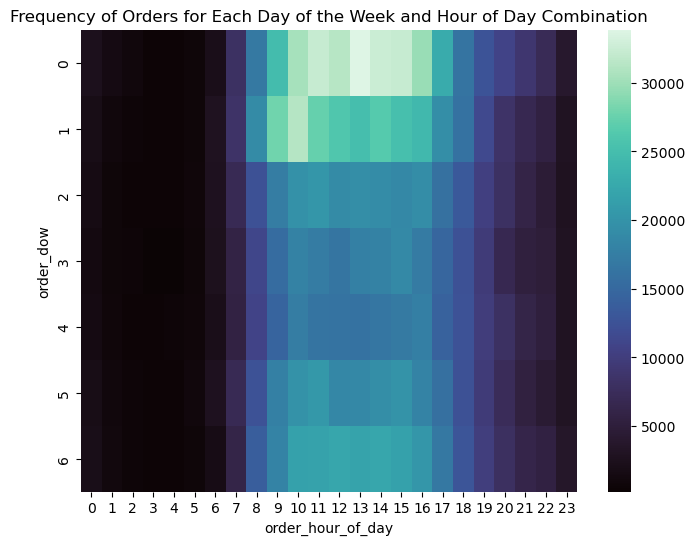

In [28]:
# finding a relationship between order_dow and order_hour_of_day.
order_frequency = df_clean.pivot_table(index='order_dow', columns='order_hour_of_day', aggfunc='size', fill_value=0)
plt.figure(figsize=(8,6))
sns.heatmap(order_frequency, cmap='mako')
plt.title('Frequency of Orders for Each Day of the Week and Hour of Day Combination')
plt.show()

In [29]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale, StandardScaler, normalize

In [30]:
# scaling the data with standardizing the features 
scalar = StandardScaler()
scaled_data = scalar.fit_transform(df_clean.iloc[:, :-4])

### After importing the libraries we are going to use, we use Standard Scaler to help the model understand better the data.

In [31]:
# finding the optimal number of clusters in k-means 

inertia = [] 
silhouette = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(scaled_data)
    k_in = kmeans.inertia_
    print('check with {} clusters | Inertia : {}'.format(k, k_in))
    inertia.append(k_in)
    labels = kmeans.fit_predict(scaled_data)
    silhouette.append(silhouette_score(scaled_data, labels, sample_size=10000))

check with 2 clusters | Inertia : 13344925.591669101
check with 3 clusters | Inertia : 12187905.080188297
check with 4 clusters | Inertia : 11386888.669877475
check with 5 clusters | Inertia : 10524979.150676664
check with 6 clusters | Inertia : 10016792.313026614
check with 7 clusters | Inertia : 9812473.880665835
check with 8 clusters | Inertia : 9371584.353064433
check with 9 clusters | Inertia : 9053499.398019921
check with 10 clusters | Inertia : 8846563.218823716


### Adding more clusters leads to a significant reduction in inertia, but beyond a certain point, the reduction becomes marginal. This happened with 5-6 clusters

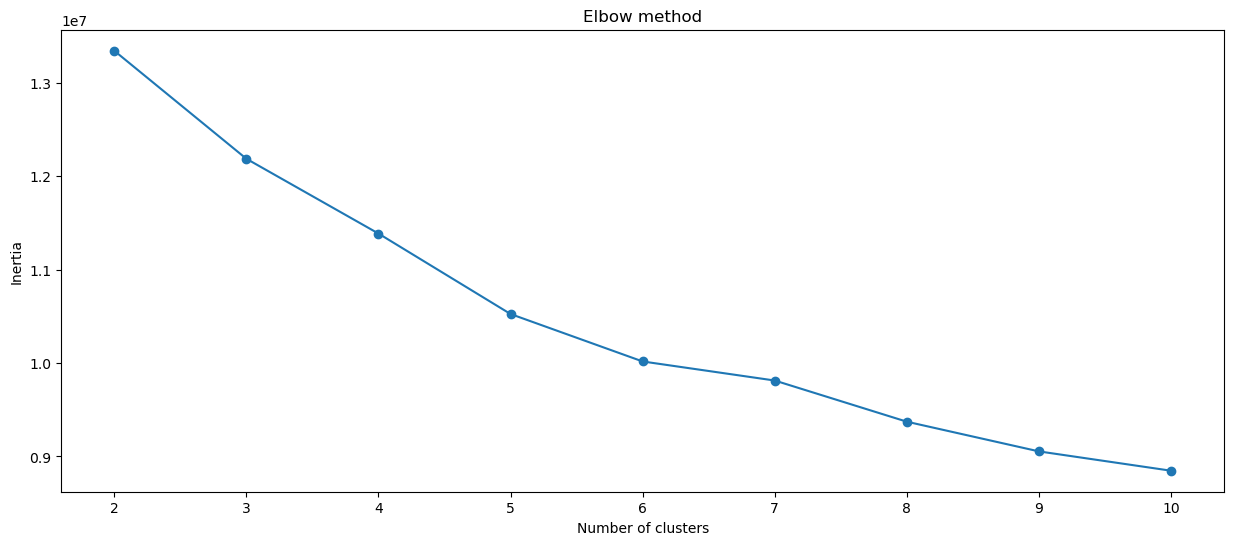

In [32]:
# ploting the Elbow method 
plt.figure(figsize=(15,6))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

### With Elbow method we can confirm that k=5 

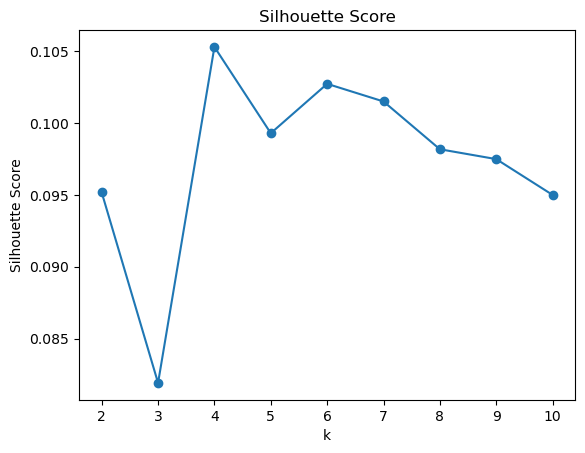

In [33]:
# Plotting the silhouette score
plt.plot(range(2, 11), silhouette, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

### With Silhouette score we can see that also k=6 can be use.

In [34]:
# Chossing k = 6 as the optimal number of clusters 
kmeans = KMeans(n_clusters=6, n_init='auto')
kmeans.fit(scaled_data)
kmeans_labels = kmeans.fit_predict(scaled_data)

In [35]:
# Add the 'cluster' column to dataframe
df_clean['cluster'] = kmeans_labels

In [36]:
df_clean.head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,cluster
0,2425083,49125,1,2,18,-1,17,1,False,13,pantry,baking ingredients,0
1,2425083,49125,1,2,18,-1,91,2,False,16,dairy eggs,soy lactosefree,1
2,2425083,49125,1,2,18,-1,36,3,False,16,dairy eggs,butter,0
3,2425083,49125,1,2,18,-1,83,4,False,4,produce,fresh vegetables,1
4,2425083,49125,1,2,18,-1,83,5,False,4,produce,fresh vegetables,1
5,2425083,49125,1,2,18,-1,91,6,False,16,dairy eggs,soy lactosefree,1
6,2425083,49125,1,2,18,-1,120,7,False,16,dairy eggs,yogurt,1
7,2425083,49125,1,2,18,-1,59,8,False,15,canned goods,canned meals beans,1
8,2425083,49125,1,2,18,-1,35,9,False,12,meat seafood,poultry counter,0
9,1944304,162867,1,3,17,-1,37,1,False,1,frozen,ice cream ice,0


In [37]:
# Ploting the clusters in 2D using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

### We use PCA(Principal Component Analysis) to improve the interpretability and reduce the dimensionality, because we have more than 1 million records(centroids).

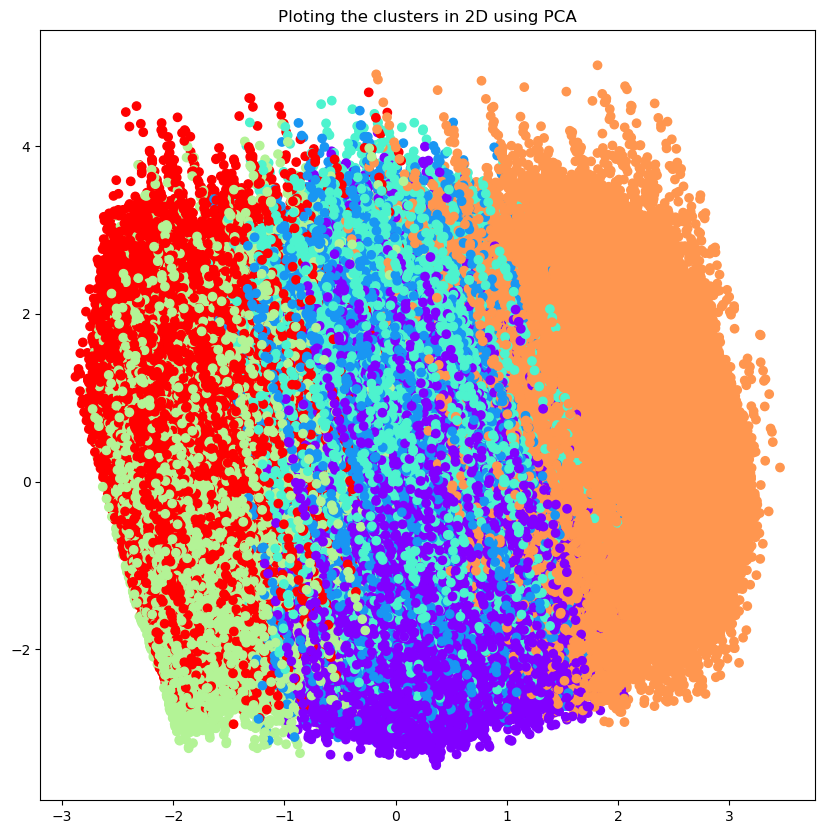

In [38]:
plt.figure(figsize=(10, 10))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='rainbow')

plt.title('Ploting the clusters in 2D using PCA')
plt.show()

In [39]:
# Ploting the clusters in 3D using PCA 
pca = PCA(n_components=3, random_state=0)
pca_data = pca.fit_transform(scaled_data)

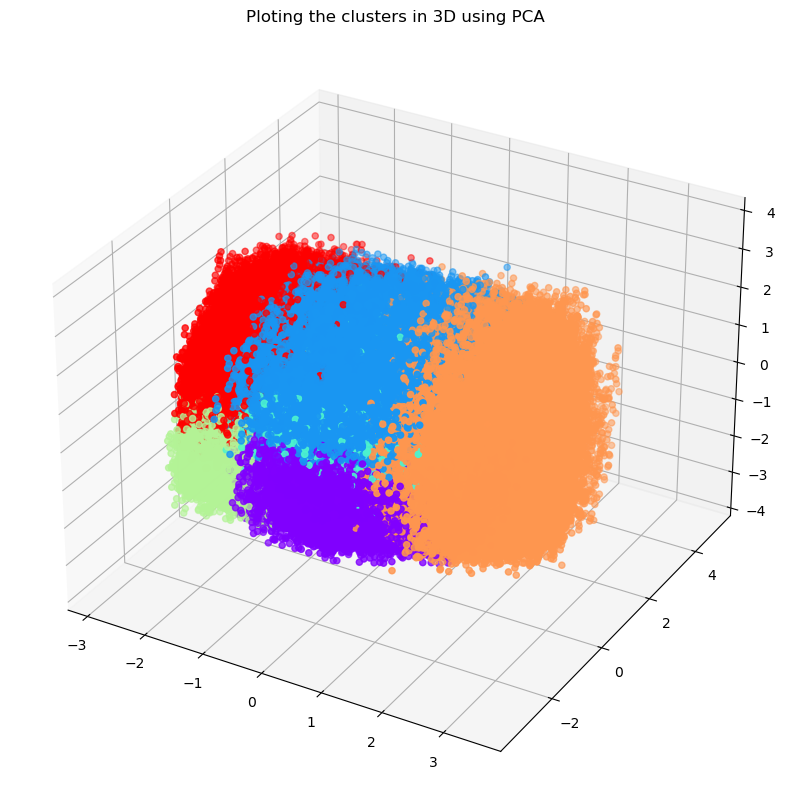

In [40]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax =fig.add_subplot(111, projection='3d')
plt.title('Ploting the clusters in 3D using PCA')
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=kmeans_labels, cmap='rainbow')
plt.show()

### We also plotted in 3D to see a better representation of the clusters.

### Cluster help us focus especially on segmentation of the clients at creating the different clusters. With this we can develop campaigns to encourage our clients to reorder or buy new products.

In [41]:
df_clean['cluster'].value_counts()

0    413335
1    379718
2    377476
4    288508
5    222905
3    168631
Name: cluster, dtype: int64

In [42]:
# finding the most popular products in each department 
product_cl = pd.crosstab(df_clean['order_hour_of_day'], df_clean['cluster'])
product_cl.idxmax(axis=1).to_frame(name="Most popular order_hour by cluster")

,Most popular order_hour by cluster
order_hour_of_day,
0,0
1,0
2,0
3,0
4,1
5,0
6,1
7,4
8,0


In [43]:
# finding the most popular products in each department 
product_cl_2 = pd.crosstab(df_clean['reordered'], df_clean['cluster'])
product_cl_2.idxmax(axis=1).to_frame(name="Most popular reordered by cluster")

,Most popular reordered by cluster
reordered,
False,0
True,0


In [44]:
# finding the most popular products in each department 
product_cl_3 = pd.crosstab(df_clean['department'], df_clean['cluster'])
product_cl_3.idxmax(axis=1).to_frame(name="Most popular department by cluster")

,Most popular department by cluster
department,
alcohol,0
babies,2
bakery,1
beverages,2
breakfast,1
bulk,0
canned goods,1
dairy eggs,1
deli,1


In [45]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1850573 entries, 0 to 2019500
Data columns (total 13 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                category
 1   user_id                 category
 2   order_number            int64   
 3   order_dow               int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  int64   
 6   product_id              category
 7   add_to_cart_order       int64   
 8   reordered               bool    
 9   department_id           category
 10  department              object  
 11  product_name            object  
 12  cluster                 int32   
dtypes: bool(1), category(4), int32(1), int64(5), object(2)
memory usage: 151.6+ MB


In [46]:
# Assuming 'cluster' and 'product_name' are your actual column names
cluster_product_counts = df_clean.groupby('cluster')['product_name'].value_counts().unstack(fill_value=0)

# Display the DataFrame
print(cluster_product_counts)

product_name  air fresheners candles  asian foods  baby accessories  \
cluster                                                               
0                                  0          691                 0   
1                                350         2561               135   
2                                414         2521               146   
3                                  0          473                 0   
4                                132         1618                96   
5                                261         1509                70   

product_name  baby bath body care  baby food formula  bakery desserts  \
cluster                                                                 
0                               0                  0             1360   
1                             128               6541                0   
2                             136               6740                0   
3                               0                  0              

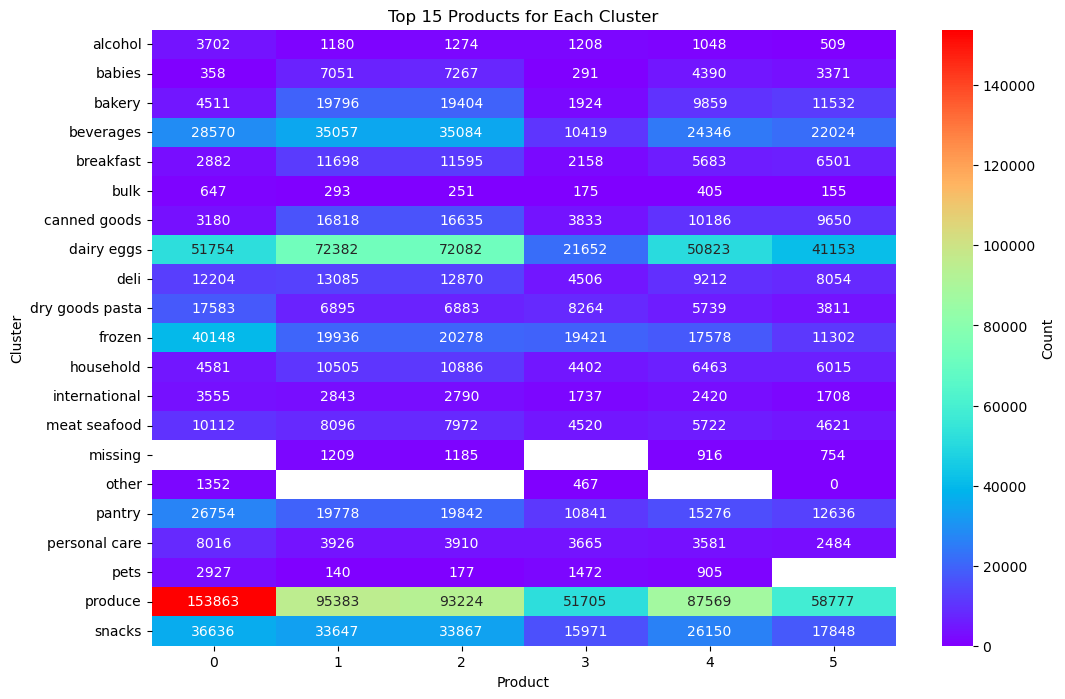

In [47]:

# Assuming 'cluster' and 'product_name' are your actual column names
cluster_product_counts = df_clean.groupby('department')['cluster'].value_counts().unstack(fill_value=0)

# Get the top 15 products for each cluster
top_products_by_cluster = cluster_product_counts.apply(lambda x: x.sort_values(ascending=False).head(20))

# Plotting a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(top_products_by_cluster, cmap='rainbow', annot=True, fmt='.0f', cbar_kws={'label': 'Count'})
plt.title('Top 15 Products for Each Cluster')
plt.xlabel('Product')
plt.ylabel('Cluster')
plt.show()
